# Capstone 1: Fantasy NFL (EDA)

The aim of this project is to understand what factors impact on the amount of fantasy points an NFL player will score in week.

In a previous notebook, we wrangled the original dataset into a clean version that we will import now. Following this, we will investigate and analyse the data to see if we can uncover any trends or corrleations that might indicate what factors we think can help answer our question of what indicates a good fantasy performance.  

## Import packages & load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.stats

In [2]:
#os.listdir()

In [3]:
path = 'C:\\Users\\Admin\\Dropbox\\Rory\\01 - Development\\Data Science\\Springboard\\Career Track\\Capstone Projects\\Fantasy NFL\\01 Data Wrangling'
os.chdir(path)
#os.listdir()

In [4]:
file = 'NFL_FantasyData_2015_2019.csv'
nfl = pd.read_csv(file, index_col=0)

## Investigate Dataset

Initially I looked at the basic shape and stats related to the dataset to refamiliarise myself with the dataset.

In [5]:
#nfl.head()

In [6]:
nfl.shape

(23715, 60)

In [7]:
#nfl.info()

In [8]:
#nfl.describe()

In [9]:
#nfl.SEASON.unique()
#nfl.SEASON.value_counts()

In [10]:
#for x in nfl_skill.columns: print(x)

### Position Group

Looking at the dataset, I can see there is a large amount of columns to analyse. Specifically the columns, some of these stats are specific to QBs in the data set with other linked more to skill position players of RB, WR and TE.

With this in mind, I have decided to split out the data between skill positions (RB, WR, TE) and QBs.

In [11]:
nfl_skill = nfl[((nfl['POS_AGG']=='RB') | (nfl['POS_AGG']=='WR') | (nfl['POS_AGG']=='TE'))]
#nfl_skill.POS_AGG.unique()
print('Skill Player data: ', nfl_skill.shape)

nfl_qb = nfl[nfl['POS_AGG']=='QB']
#nfl_qb.POS_AGG.unique()
print('QB Player data: ', nfl_qb.shape)

Skill Player data:  (20502, 60)
QB Player data:  (3015, 60)


As the Skill Player dataset has more rows available and with the view of reducing the columns / features to analyse, I have decided to continue my analysis on only the **nfl_skill** dataset.

In the following lines, I will remove QB-related statisitcs from the dataset to reduce the number of columns in the dataset.

In [12]:
qbstats_list = ['PASSCOMP', 'PASSATT', 'PASSCOMP%', 'PASSYDS', 'PASSTD', 'INT', 'QBRAT', 'SACK', 'SACKYDS', 'FAN_PASSYDS', 'FAN_PASSTD', 'FAN_PASSYDS_300', 'FAN_PASSYDS_400', 'FAN_INT', 'FAN_SACK', 'FAN_PASS_TOT']
nfl_skill = nfl_skill.drop(qbstats_list, axis=1)

In [13]:
#nfl_skill.head()
nfl_skill.shape

(20502, 44)

Finally, I see there are two columns relating to position and I want to see difference.

In [14]:
print(nfl_skill.POS.unique())
print(nfl_skill.POS_AGG.unique())

['WR' 'RB' 'FB' 'TE']
['WR' 'RB' 'TE']


The only difference between the two columns is the inclusion of 'FB' which may be useful as initial thinking is that this position will score less than 'RB' as it focus more on blocking than running the football and often only used in to run ball in certain situations.

For this reason, I will remove the 'POS_AGG' field from this analysis.

In [15]:
nfl_skill = nfl_skill.drop('POS_AGG', axis=1)

### Game Setting Columns

Next, I'm going to look at a few columns related to game setting and result to see what type of values they have stored in them.

In [16]:
print(nfl_skill['H/A'].unique())
print(nfl_skill['ROOF'].unique())
print(nfl_skill['SURFACE'].unique())

['Home' 'Away']
['Open' 'Dome']
['Grass' 'Turf']


As these columns have two variables in them, I would like to turn into booleans as True / False on whether one side of the attribute exists.

In [17]:
nfl_skill['Home'] = np.where(nfl_skill['H/A'] == 'Home', 1, 0)
nfl_skill['Dome'] = np.where(nfl_skill['ROOF'] == 'Dome', 1, 0)
nfl_skill['Grass'] = np.where(nfl_skill['SURFACE'] == 'Grass', 1, 0)

#nfl_skill[['PLAYER_NAME', 'TEAM', 'Home', 'Dome', 'Grass']]

### Game Result

In [18]:
print(nfl_skill['W/L'].unique())

['L' 'W' 'T']


Game result column returns three outcomes - Win, Loss or Tie. Similar to above, I would like to turn these into booleans and will therefore create three new variables to underscore whether a team Won, Lost or Tied a game.

In [19]:
nfl_skill['Win'] = np.where(nfl_skill['W/L'] == 'W', 1, 0)
nfl_skill['Loss'] = np.where(nfl_skill['W/L'] == 'L', 1, 0)
nfl_skill['Tie'] = np.where(nfl_skill['W/L'] == 'T', 1, 0)

#nfl_skill[['PLAYER_NAME', 'TEAM', 'Win', 'Loss', 'Tie']]

Through the creation of these variables, I no longer think I require the 'H/A', 'ROOF', 'SURFACE', and 'W/L' columns so I will remove these from the dataset.

In [20]:
nfl_skill = nfl_skill.drop(['H/A', 'ROOF', 'SURFACE', 'W/L'], axis=1)

### Time / Date

Next I want to investigate the time/date related columns to see if any formatting is required here.

In [21]:
#print(nfl_skill['TIME'].unique())
#print(nfl_skill['MONTH'].unique())
#print(nfl_skill['WEEK'].unique())
#print(nfl_skill['DAY'].unique())
#print(nfl_skill['SEASON'].unique())

I see that the 'WEEK' column includes the string 'Week' in every unique type. I would prefer this to be a number as this may allow me to sort the data by Week at a later stage if required.

In [22]:
nfl_skill['Week_Number'] = nfl_skill['WEEK'].apply(lambda x: x[4:]).astype(int)
#nfl_skill['Week Number']

#### Time & Date Value Counts

I'm interested to see how the values vary across each time & date category type. 

In [23]:
#nfl_skill.TIME.value_counts()
#nfl_skill.MONTH.value_counts()
#nfl_skill.Week_Number.value_counts().sort_index()
#nfl_skill.DAY.value_counts()
#nfl_skill.SEASON.value_counts()

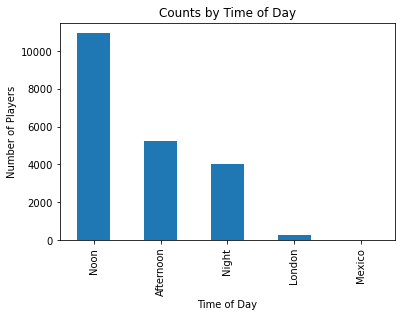

In [24]:
# plt.hist(nfl_skill['TIME'])

_ = nfl_skill['TIME'].value_counts().plot(kind='bar')
_ = plt.xlabel('Time of Day')
_ = plt.ylabel('Number of Players')
_ = plt.title('Counts by Time of Day')

plt.show()

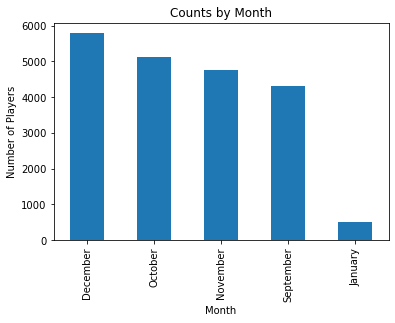

In [25]:
_ = nfl_skill['MONTH'].value_counts().plot(kind='bar')
_ = plt.xlabel('Month')
_ = plt.ylabel('Number of Players')
_ = plt.title('Counts by Month')

plt.show()

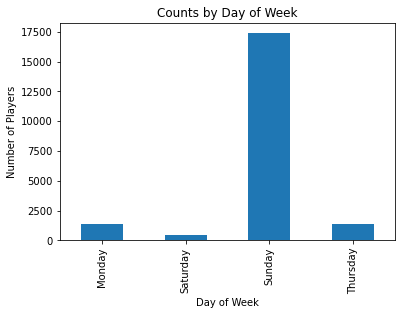

In [26]:
_ = nfl_skill['DAY'].value_counts().sort_index().plot(kind='bar')
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Number of Players')
_ = plt.title('Counts by Day of Week')

plt.show()

The above is interesting to see distribution of data across each of those categories. It highlights that:


* Time: Most data points relate to games at Noon (11k), with Afternoon and Night counts following after. London and Mexico have only a few counts between them. 

* Month: December, Novermber and October have highest number of values which makes sense as games are played each week during these months. September is slightly lower as season starts in this month and January only has a few games at the end of a season before playoffs.

* Week: Even distribution around per week.

* Day: Majority of values on Sunday as this is main day of week for NFL games. Monday and Thursday usually have one game a week so this share makes sense. Only on rare occasion are there games on Saturday (0.4k). 

* Season: Evenly distributed per season as expected.

#### Fantasy Points by Time & Date Categories

The aim of this project is to understand what determines a players fantasy performance in a given week. With this in mind, I decided to see how fanatsy performance varied by the time & date categories highlighted above.

In [27]:
#nfl_skill.groupby('TIME')['FAN_TOT'].mean()
#nfl_skill.groupby('MONTH')['FAN_TOT'].mean()
#nfl_skill.groupby('Week_Number')['FAN_TOT'].mean()
#nfl_skill.groupby('DAY')['FAN_TOT'].mean()
#nfl_skill.groupby('SEASON')['FAN_TOT'].mean()

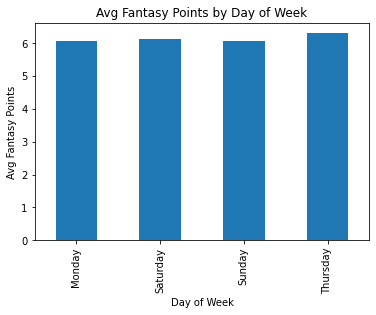

In [28]:
_ = nfl_skill.groupby('DAY')['FAN_TOT'].mean().sort_index().plot(kind='bar')
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Avg Fantasy Points')
_ = plt.title('Avg Fantasy Points by Day of Week')

plt.show()

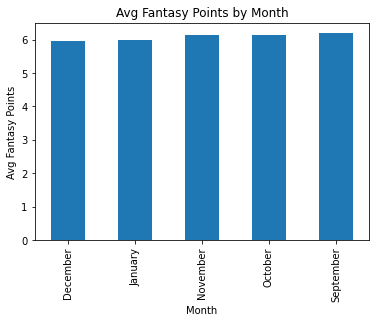

In [29]:
_ = nfl_skill.groupby('MONTH')['FAN_TOT'].mean().sort_index().plot(kind='bar')
_ = plt.xlabel('Month')
_ = plt.ylabel('Avg Fantasy Points')
_ = plt.title('Avg Fantasy Points by Month')

plt.show()

The review above doesn't indicate any great change betweend the Date & Time variables. The only two mildy interesting observations were:

* Day: Fantasy points seemed to be higher on Thursday and Saturdays. Might be interesting to see if this is true or small sample size.
* Month: Fantasy points seemed to decline slightly as went from Autumn (Sept, Oct, Nov) to Winter (Dec, Jan).

#### Date Column

In [30]:
#print(nfl_skill['DATE'].unique())

Wide variety of dates in 'yyyy-mm-dd' format.

In [31]:
#for x in nfl_skill.columns: print(x)

## Fantasy Points

The object of this project is to identify which factors influence the amount of fantasy points an NFL player scores in a given week. As this is the main variable of interest, I will look a bit further into understanding what influences it.

#### Distribution

I'm going to start by looking at the distribution of fantasy points across the dataset using a histogram.

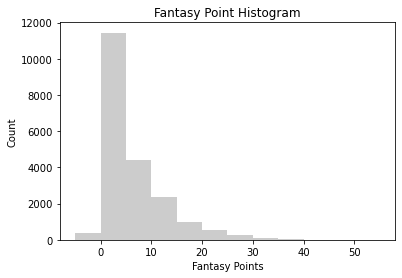

In [32]:
# Original code used but went with manual bins to allow easier explanation of data
#_ = sns.distplot(nfl_skill["FAN_TOT"], kde=False, bins=20, color='grey')

fan_pt_bins = [-5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

_ = sns.distplot(nfl_skill["FAN_TOT"], kde=False, bins=fan_pt_bins, color='grey')
_ = plt.xlabel('Fantasy Points')
_ = plt.ylabel('Count')
_ = plt.title('Fantasy Point Histogram')

plt.show()

The data indicates that there are a lot of relatively low values, with majority of data in the 0 to 5 fantasy points range.

However, there is no clear indication of the distribution type (maybe exponential?) and will need to test this further.

To do this, I felt an Empirical Cumulative Distribution Function (ECDF) would show this more clearly. Below highlights the function to create this ECDF, followed by a plot showing the total fantasy point data distribution.

In [33]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

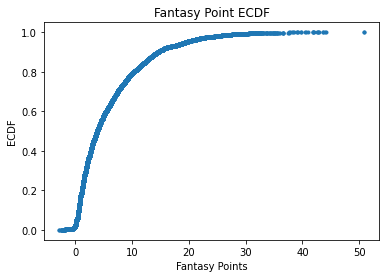

In [34]:
# Compute ECDF
x_fan, y_fan = ecdf(nfl_skill.FAN_TOT)

# Generate plot
_ = plt.plot(x_fan, y_fan, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('Fantasy Points')
_ = plt.ylabel('ECDF')
_ = plt.title('Fantasy Point ECDF')

# Display the plot
plt.show()

Next, we would like to test if this distribution follows a normal distribution.

To do this, I will need to get the Mean and Standard Deviation of the Fantasy Points Data and use this to generate a Normal disribution. 

In [35]:
nfl_skill['FAN_TOT'].describe()

count    20502.000000
mean         6.093749
std          6.368980
min         -2.800000
25%          1.500000
50%          3.900000
75%          8.800000
max         50.800000
Name: FAN_TOT, dtype: float64

In [36]:
fan_pt_mean = np.mean(nfl_skill['FAN_TOT'])
fan_pt_std = np.std(nfl_skill['FAN_TOT'])

In [37]:
fan_pt_normdist = np.random.normal(fan_pt_mean, fan_pt_std, size=100000)

I will then plot this on top of the previous ECDF to see if it follow the same distribution as a normal distribution.

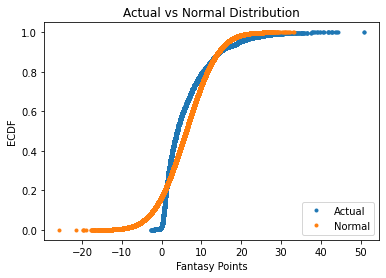

In [38]:
# Generate Normal Distribution ECDF
x_norm, y_norm = ecdf(fan_pt_normdist)

# Generate plot
_ = plt.plot(x_fan, y_fan, marker='.', linestyle='none')
_ = plt.plot(x_norm, y_norm, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('Fantasy Points')
_ = plt.ylabel('ECDF')
_ = plt.title('Actual vs Normal Distribution')

# Add Legend
_ = plt.legend(('Actual', 'Normal'), loc='lower right')

# Display the plot
plt.show()

The above graph shows that the data does not seem to follow a normal distribution. To confirm this, I will test use normaltest() fucntion from scipy.stats

In [39]:
scipy.stats.normaltest(nfl_skill['FAN_TOT'])

NormaltestResult(statistic=6794.396462755227, pvalue=0.0)

Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal.

Since the p-values is 0, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed.

#### Bootstrapping

Without testing for other distribution types, we cannot assume a distribution for the Fantasy Point data. However, through boostrapping, we can estimate the distribution within certain confidence intervals.

First, I will create functions that will allow me to generate bootstrap replicates.

In [40]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [41]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

Now, I will use this function to randomly sample (with replacement) the 'FAN_TOT' column and calculate the mean 10,000 times.

In [42]:
bootstrap_dist = draw_bs_reps(nfl_skill['FAN_TOT'], np.mean, size=10000)

This creates a sampling distribution as displayed in histogram below.

The shape follows what would be expected according to the Central Limit Theorm in that the distribution of the sample mean tends toward a normal distribution with increased sample size, regardless of the orginal distribution.

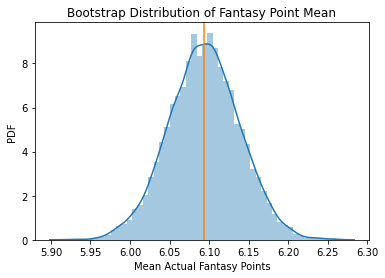

In [43]:
_ = sns.distplot(bootstrap_dist, bins=50, kde=True, hist=True, norm_hist=True)
#_ = plt.hist(FAN_ACTUAL_mean_bs_reps, bins=50, density=True)
_ = plt.xlabel('Mean Actual Fantasy Points')
_ = plt.ylabel('PDF')
_ = plt.title('Bootstrap Distribution of Fantasy Point Mean')
_ = plt.axvline(nfl_skill['FAN_TOT'].mean(), color='C1')

plt.show()

Next, we calculate the Confidence Interval of the sample distribution using the np.percentile() function.

In [44]:
conf_int = np.percentile(bootstrap_dist, [2.5, 97.5])
print('95% confidence interval =', round(conf_int[0], 2), 'to', round(conf_int[1], 2), 'points')

95% confidence interval = 6.0 to 6.18 points


The 95% confidence interval is 6.01 to 6.18. This states that the 95% of the time in which its assumptions are correct, this interval will contain the true value.

This is displayed in histogram chart below.

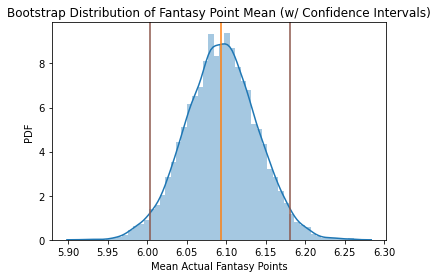

In [45]:
_ = sns.distplot(bootstrap_dist, bins=50, kde=True, hist=True, norm_hist=True)
#_ = plt.hist(FAN_ACTUAL_mean_bs_reps, bins=50, density=True)
_ = plt.xlabel('Mean Actual Fantasy Points')
_ = plt.ylabel('PDF')
_ = plt.title('Bootstrap Distribution of Fantasy Point Mean (w/ Confidence Intervals)')
_ = plt.axvline(nfl_skill['FAN_TOT'].mean(), color='C1')
_ = plt.axvline(conf_int[0], color='C5')
_ = plt.axvline(conf_int[1], color='C5')

plt.show()

Another way to calculate this would be using the Margin of Error calculation.

In [46]:
moe_bootstrap_dist = 1.96 * np.std(bootstrap_dist)
print('Margin of Error: ', round(moe_boostrap_dist, 2))

NameError: name 'moe_boostrap_dist' is not defined

In [ ]:
mean_bootstrap_dist = np.mean(bootstrap_dist)
print('Sample Mean: ', round(mean_bootstrap_dist, 2))

In [ ]:
high_bootstrap_dist = mean_bootstrap_dist + moe_bootstrap_dist
low_bootstrap_dist = mean_bootstrap_dist - moe_bootstrap_dist
#print(low_bootstrap_dist, high_bootstrap_dist)

This shows that an estimate for the 'FAN_TOT' could be written as:

Estimate = 6.09 +/- 0.09

#### Distribution by Position

Next I wanted to see if this changed drastically by player position. I didn't think a histogram would be best way to graphically display this so decided to go with a kernel density estimation plot to show fantasy point distribution varied by position.

In [ ]:
_ = sns.kdeplot(nfl_skill["FAN_TOT"], color='red', label='Total')
_ = sns.kdeplot(nfl_skill[nfl_skill['POS'] =='RB']["FAN_TOT"], color='blue', label='RB')
_ = sns.kdeplot(nfl_skill[nfl_skill['POS'] =='WR']["FAN_TOT"], color='green', label='WR')
_ = sns.kdeplot(nfl_skill[nfl_skill['POS'] =='TE']["FAN_TOT"], color='yellow', label='TE')
_ = sns.kdeplot(nfl_skill[nfl_skill['POS'] =='FB']["FAN_TOT"], color='brown', label='FB')

_ = plt.xlabel('Fantasy Points')
_ = plt.ylabel('% Share')
_ = plt.title('KDE of Fantasy Points by Position')

plt.show()

In [ ]:
x_fan_RB, y_fan_RB = ecdf(nfl_skill[nfl_skill['POS'] =='RB']["FAN_TOT"])
x_fan_WR, y_fan_WR = ecdf(nfl_skill[nfl_skill['POS'] =='WR']["FAN_TOT"])
x_fan_TE, y_fan_TE = ecdf(nfl_skill[nfl_skill['POS'] =='TE']["FAN_TOT"])
x_fan_FB, y_fan_FB = ecdf(nfl_skill[nfl_skill['POS'] =='FB']["FAN_TOT"])

_ = plt.plot(x_fan_RB, y_fan_RB, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_fan_WR, y_fan_WR, marker='.', linestyle='none', color='green')
_ = plt.plot(x_fan_TE, y_fan_TE, marker='.', linestyle='none', color='yellow')
_ = plt.plot(x_fan_FB, y_fan_FB, marker='.', linestyle='none', color='brown')
_ = plt.plot(x_norm, y_norm, marker='.', linestyle='none', color='red')

_ = plt.xlabel('Fantasy Points')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Fantasy Points by Position')

# Display the plot
plt.show()

This last ECDF seems to show clearly that RB position tends to have higher probability of scoring higher fantasy points, followed soon after by WR. TE and FB tend to be much lower scoring positions. 

However, similar to overall trend, none seem to have a Normal Distribution.

#### Outliers

Next I wanted to look at the Fantasy Points data to see in more detail where the outliers in the data were and how this might be creating a right tail on the data.

I will begin looking a simple summary statistics followed by investigating boxplots.

In [ ]:
#nfl_skill.FAN_TOT.describe()

In [ ]:
_ = plt.boxplot(nfl_skill.FAN_TOT)
_ = plt.xlabel('Total')
_ = plt.ylabel('Fantasy Points')
_ = plt.title('Fantasy Points (Boxplot)')
_ = plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.show()

In [ ]:
_ = sns.boxplot(data=nfl_skill, x='POS', y='FAN_TOT')
_ = plt.xlabel('Position')
_ = plt.ylabel('Fantasy Points')
_ = plt.title('Fantasy Points by Position (Boxplot)')

plt.show()

Outliers seem to be consistent across all position types and lean towards the higher values. However, I'm not of the view that these should be exclude as these are likely to be the most interesting (i.e. how do we know when a player is going to have I high scoring fantasy week). There is a larger number of low values that will need to be accounted for and will interesting to see if players who consistently score low, continue to do so - and the same with high scoring players.

## Exploratory Data Analysis

In [ ]:
_ = plt.figure(figsize=(14, 12))
_ = sns.heatmap(nfl_skill.corr(), linewidth=.1, cmap='icefire', annot=False)

plt.show()

There is currently one big issue with the dataset in that....

#### There is going be strong correlation between raw stats (i.e. Rushing Yards, Receiving Yards, TDs) and fantasy stats (i.e. Fantasy Rushing points, Fantasty Receiving points, Fantasy TD points, Fantasy Total points) as they are dervived from one another.

This means that the variables are not independent of each other.

To further develop and gain insight from this data we will need to:

1) Tidy our data further by removing similar columns (i.e. 'RUSHYDS' and 'FAN_RUSHYDS')

2) We will need to create new columns that provide us with a player's performance in the weeks before the game - not during it. We will do this by creating rolling averages.

### Removing Unnecessary Columns

In [ ]:
fantasy_columns_drop = ['FAN_RUSHYDS', 'FAN_RUSHTD', 'FAN_FUMLST', 'FAN_RUSH_TOT', 'FAN_RECYDS', 'FAN_RECTD', 'FAN_REC_TOT']
nfl_skill = nfl_skill.drop(fantasy_columns_drop, axis=1)

In [ ]:
#nfl_skill.columns

In [ ]:
new_column_names = {'FAN_RUSHYDS_100':'RUSHYDS_100',
                    'FAN_RUSHYDS_200':'RUSHYDS_200', 
                    'FAN_RECYDS_100':'RECYDS_100', 
                    'FAN_RECYDS_200':'RECYDS_200'}

In [ ]:
nfl_skill.rename(columns=new_column_names, inplace=True)
#nfl_skill.columns

### Rolling Average - Fantasy Points

Next I want to create rolling average for the 'FAN_TOT' column that will allow me to use the previous 4-week average of 'FAN_TOT' as potential indicator of upcoming performance.

Realised that the 'DATE' field is not in a date format so I need to change this and likely sort my dataset according to date.

In [ ]:
nfl_skill['DATE'] = pd.to_datetime(nfl_skill['DATE'])

In [ ]:
#nfl_skill.info()

Sorting dataset by 'DATE' so that future calculations for rolling averages are done in the correct order

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)

Below code is used to create a 4 week rolling average for Fantasy Points scored by each player

In [ ]:
nfl_skill['FAN_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['FAN_TOT'].transform(lambda x: x.rolling(4, 1).mean())

Below code is used as spot check to see if column was created as expected.

In [ ]:
#nfl_skill[nfl_skill['PLAYER_NAME']=='Calvin Ridley'][['PLAYER_NAME', 'DATE', 'FAN_TOT', 'FAN_4WK_AVG']]

Now I want to move this 4 week average from previous game week to this week to understand how a players fantasy performance in the past three weeks corresponds to his performance in that week.

In [ ]:
nfl_skill['FAN_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['FAN_4WK_AVG'].shift()

Below code is used as spot check to see if column was created as expected.

In [ ]:
#nfl_skill[nfl_skill['PLAYER_NAME']=='Adrian Peterson'][['PLAYER_NAME', 'DATE', 'FAN_TOT', 'FAN_4WK_AVG', 'FAN_4WK_AVG_SHIFT']]

### Rolling Averages - Other Columns

Next I want to create rolling averages for each of the main raw stats available, namely:

* 'RUSHATT'
* 'RUSHYDS'
* 'RUSHTD'
* 'TGTS'
* 'REC'
* 'RECYDS'
* 'RECTDS'
* 'FUM'
* 'FUMLST'
* 'RUSHYDS_100'
* 'RUSHYDS_200'
* 'RECYDS_100'
* 'RECYDS_200'

I will also create rolling averages for game data:
* 'PTS_FOR'
* 'PTS_AGT'
* 'Win'
* 'Loss'
* 'Tie'

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['RUSHATT_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['RUSHATT'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['RUSHATT_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['RUSHATT_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['RUSHYDS_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['RUSHYDS'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['RUSHYDS_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['RUSHYDS_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['RUSHTD_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['RUSHTD'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['RUSHTD_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['RUSHTD_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['TGTS_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['TGTS'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['TGTS_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['TGTS_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['REC_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['REC'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['REC_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['REC_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['RECYDS_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['RECYDS'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['RECYDS_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['RECYDS_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['RECTD_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['RECTD'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['RECTD_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['RECTD_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['FUM_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['FUM'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['FUM_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['FUM_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['FUMLST_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['FUMLST'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['FUMLST_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['FUMLST_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['RUSHYDS100_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['RUSHYDS_100'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['RUSHYDS100_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['RUSHYDS100_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['RUSHYDS200_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['RUSHYDS_200'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['RUSHYDS200_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['RUSHYDS200_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['RECYDS100_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['RECYDS_100'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['RECYDS100_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['RECYDS100_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['RECYDS200_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['RECYDS_200'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['RECYDS200_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['RECYDS200_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['PTSFOR_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['PTS_FOR'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['PTSFOR_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['PTSFOR_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['PTSAGT_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['PTS_AGT'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['PTSAGT_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['PTSAGT_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['LOSS_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['Loss'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['LOSS_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['LOSS_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['WIN_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['Win'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['WIN_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['WIN_4WK_AVG'].shift()

In [ ]:
nfl_skill.sort_values(by='DATE', ascending=True, inplace=True)
nfl_skill['TIE_4WK_AVG'] = nfl_skill.groupby('PLAYER_NAME')['Tie'].transform(lambda x: x.rolling(4, 1).mean())
nfl_skill['TIE_4WK_AVG_SHIFT'] = nfl_skill.groupby('PLAYER_NAME')['TIE_4WK_AVG'].shift()

### NaN values

Because of the shift, we now have NaN values in our data - 973 rows or 4.7% of the dataset. There are a couple of options in how we could handle these values:

1) We could drop these values as in a real life situations, we would have no information on a player's previous performance (as they would have not played a game) and therefore have no information to project performance from

2) We could look to replace these values with the historic average performance of players in their first week playing

For simplicity I will go with option 1 for this analysis. However, in future analysis, I would ideally like estimate the correct number to fill in these NaNs (i.e. average performance of WR in first week with no data) as outlined in option 2.

It is also worth pointing out a this stage that, while we are looking at a 4-week average, the calculation is set to assume average of shorter periods until 4 weeks of data is available (i.e. Week 3 of player's first season will assume his average of first two weeks as three weeks of data is not available).

In [ ]:
#nfl_skill.info()

In [ ]:
nfl_skill.shape

In [ ]:
nfl_skill = nfl_skill.dropna()

In [ ]:
#nfl_skill.info()

In [ ]:
nfl_skill.shape

### Removing Unnecessary Columns

After the creation of the columns we have 77! This is too many and although a lot of the columns have helped us shape the data they are no longer necessary. The next steps are to remove the variables we no longer need.

First I will remove the raw stats used to calculate rolling averages

In [ ]:
raw_stat_list = ['RUSHATT', 'RUSHYDS', 'RUSHTD', 'RUSHYDS_100', 'RUSHYDS_200', 'FUM', 'FUMLST', 'TGTS', 'REC', 'RECYDS', 'RECTD', 'RECYDS_100', 'RECYDS_200', 'PTS_FOR', 'PTS_AGT', 'Win', 'Loss', 'Tie']
nfl_skill = nfl_skill.drop(raw_stat_list, axis=1)

Next I will remove the rollling averages before the shift

In [ ]:
avg_4wk_list = ['RUSHATT_4WK_AVG', 'RUSHYDS_4WK_AVG', 'RUSHTD_4WK_AVG', 'RUSHYDS100_4WK_AVG', 'RUSHYDS200_4WK_AVG', 'FUM_4WK_AVG', 'FUMLST_4WK_AVG', 'TGTS_4WK_AVG', 'REC_4WK_AVG', 'RECYDS_4WK_AVG', 'RECTD_4WK_AVG', 'RECYDS100_4WK_AVG', 'RECYDS200_4WK_AVG', 'PTSFOR_4WK_AVG', 'PTSAGT_4WK_AVG', 'FAN_4WK_AVG', 'WIN_4WK_AVG', 'LOSS_4WK_AVG', 'TIE_4WK_AVG']
nfl_skill = nfl_skill.drop(avg_4wk_list, axis=1)

In [ ]:
nfl_skill.shape

I will also remove the the columns that relate to the coaches for both the player's team and the opposition. This could very well be useful data to create insights but for the moment is outside the scope of this project.

In [ ]:
coach_list = ['HC', 'OC', 'DC', 'OPP HC', 'OPP OC', 'OPP DC']
nfl_skill = nfl_skill.drop(coach_list, axis=1)

In [ ]:
nfl_skill.shape

Lastly, I'm going to rename the columns to make them easier to call going forward.

In [ ]:
new_column_names_2 = {'PLAYER_NAME':'PLAYER',
                    'Home':'HOME',
                    'Dome':'DOME',
                    'Grass':'GRASS',
                    'Week_Number':'WEEK_NUMBER',
                    'FAN_TOT':'FAN_ACTUAL', 
                    'FAN_4WK_AVG_SHIFT':'FAN_AVG', 
                    'RUSHATT_4WK_AVG_SHIFT':'RUSHATT_AVG',
                    'RUSHYDS_4WK_AVG_SHIFT':'RUSHYDS_AVG',
                    'RUSHTD_4WK_AVG_SHIFT':'RUSHTD_AVG',
                    'TGTS_4WK_AVG_SHIFT':'TGTS_AVG',
                    'REC_4WK_AVG_SHIFT':'REC_AVG',
                    'RECYDS_4WK_AVG_SHIFT':'RECYDS_AVG',
                    'RECTD_4WK_AVG_SHIFT':'RECTD_AVG',
                    'FUM_4WK_AVG_SHIFT':'FUM_AVG',
                    'FUMLST_4WK_AVG_SHIFT':'FUMLST_AVG',
                    'RUSHYDS100_4WK_AVG_SHIFT':'RUSHYDS100_AVG',
                    'RUSHYDS200_4WK_AVG_SHIFT':'RUSHYDS200_AVG',
                    'RECYDS100_4WK_AVG_SHIFT':'RECYDS100_AVG',
                    'RECYDS200_4WK_AVG_SHIFT':'RECYDS200_AVG',
                    'PTSFOR_4WK_AVG_SHIFT':'PTSFOR_AVG',
                    'PTSAGT_4WK_AVG_SHIFT':'PTSAGT_AVG',
                    'WIN_4WK_AVG_SHIFT':'WIN_AVG',
                    'LOSS_4WK_AVG_SHIFT':'LOSS_AVG',
                    'TIE_4WK_AVG_SHIFT':'TIE_AVG',}

In [ ]:
nfl_skill.rename(columns=new_column_names_2, inplace=True)

## Correlation

In [ ]:
_ = plt.figure(figsize=(14, 12))
_ = sns.heatmap(nfl_skill.corr(), linewidth=.1, cmap='summer', annot=False)

plt.show()

In [ ]:
_ = sns.pairplot(nfl_skill,  palette='Set1')
plt.show()

Our variable of interest is 'FAN_ACTUAL' and the above heatmap doesn't show that many strong correlations - 'FAN_AVG' being the strongest. Let's dig into this one a bit more before looking at other variables.

In [ ]:
_ = sns.jointplot(x='FAN_ACTUAL', y='FAN_AVG', data=nfl_skill, kind="reg")
plt.show()

In [ ]:
print(np.corrcoef(nfl_skill['FAN_ACTUAL'], nfl_skill['FAN_AVG'])[0, 1])

In [ ]:
#scipy.stats.pearsonr(nfl_skill['FAN_ACTUAL'], nfl_skill['FAN_AVG'])

In [ ]:
_ = sns.relplot(data=nfl_skill, x='FAN_ACTUAL', y='FAN_AVG', hue='POS', col='POS')
plt.show()

In [ ]:
_ = sns.relplot(data=nfl_skill, x='FAN_ACTUAL', y='FAN_AVG', hue='TIME', col='TIME')
plt.show()

In [ ]:
_ = sns.relplot(data=nfl_skill, x='FAN_ACTUAL', y='FAN_AVG', hue='POS', col='POS')
plt.show()

In [ ]:
_ = sns.lmplot(data=nfl_skill, x='FAN_ACTUAL', y='FAN_AVG', hue='POS')
plt.show()

In [ ]:
_ = sns.lmplot(data=nfl_skill, x='FAN_ACTUAL', y='FAN_AVG', hue='POS', col='POS', markers='x')
plt.show()

In [ ]:
print('RB: ' + str(round(np.corrcoef(nfl_skill[nfl_skill['POS']=='RB']['FAN_ACTUAL'], nfl_skill[nfl_skill['POS']=='RB']['FAN_AVG'])[0, 1], 2)))
print('WR: ' + str(round(np.corrcoef(nfl_skill[nfl_skill['POS']=='WR']['FAN_ACTUAL'], nfl_skill[nfl_skill['POS']=='WR']['FAN_AVG'])[0, 1], 2)))
print('TE: ' + str(round(np.corrcoef(nfl_skill[nfl_skill['POS']=='TE']['FAN_ACTUAL'], nfl_skill[nfl_skill['POS']=='TE']['FAN_AVG'])[0, 1], 2)))
print('FB: ' + str(round(np.corrcoef(nfl_skill[nfl_skill['POS']=='FB']['FAN_ACTUAL'], nfl_skill[nfl_skill['POS']=='FB']['FAN_AVG'])[0, 1], 2)))

Data to date shows a moderate correlation between the previous 4-week average fantasy points for player and there upcoming performance, with this performance being strongest in RBs.

Because of this strong performance in RBs, I will concentrate on their data for correlations between 'FAN_ACTUAL' and other 4 week averages that we gathered.

### RB Analysis

In [ ]:
nfl_rb = nfl_skill[nfl_skill['POS']=='RB']

In [ ]:
nfl_rb.shape

In [ ]:
_ = plt.figure(figsize=(14, 12))
_ = sns.heatmap(nfl_rb.corr(), linewidth=.1, cmap='autumn', annot=False)

plt.show()

In [ ]:
print('The correlation between Fantasy Points in a week and the 4-week average of the following statistics are: ')
print('')
print('Fantasy Points: ' + str(round(np.corrcoef(nfl_rb['FAN_ACTUAL'], nfl_rb['FAN_AVG'])[0, 1], 2)))
print('Rushing Att: ' + str(round(np.corrcoef(nfl_rb['FAN_ACTUAL'], nfl_rb['RUSHATT_AVG'])[0, 1], 2)))
print('Rushing Yds: ' + str(round(np.corrcoef(nfl_rb['FAN_ACTUAL'], nfl_rb['RUSHYDS_AVG'])[0, 1], 2)))
print('Rushing TD: ' + str(round(np.corrcoef(nfl_rb['FAN_ACTUAL'], nfl_rb['RUSHTD_AVG'])[0, 1], 2)))
print('Targets: ' + str(round(np.corrcoef(nfl_rb['FAN_ACTUAL'], nfl_rb['TGTS_AVG'])[0, 1], 2)))
print('Rec: ' + str(round(np.corrcoef(nfl_rb['FAN_ACTUAL'], nfl_rb['REC_AVG'])[0, 1], 2)))
print('Rec Yds: ' + str(round(np.corrcoef(nfl_rb['FAN_ACTUAL'], nfl_rb['RECYDS_AVG'])[0, 1], 2)))
print('Rec TD: ' + str(round(np.corrcoef(nfl_rb['FAN_ACTUAL'], nfl_rb['RECTD_AVG'])[0, 1], 2)))
print('100 yard Rush Games: ' + str(round(np.corrcoef(nfl_rb['FAN_ACTUAL'], nfl_rb['RUSHYDS100_AVG'])[0, 1], 2)))

This analysis of correlation specific to RB shows that the 4-week rolling average for Rushing Att and Rushing Yds have a similar correlation to 'FAN_ACTUAL' as 4-week rolling average of Fantasy Points. This seems to indicate those two indicators may be the better predictors of RB fantasy performance (along with previous fantasy performance) when continuing our analysis.

In [ ]:
_ = sns.lmplot(data=nfl_rb, x='FAN_ACTUAL', y='FAN_AVG', hue='POS', palette='autumn', legend=False)
_ = plt.xlabel('Fantasy Points')
_ = plt.ylabel('Fantasy Points (4wk avg)')
_ = plt.title('Fantasy Points (4wk average) relationship')
plt.show()

In [ ]:
_ = sns.lmplot(data=nfl_rb, x='FAN_ACTUAL', y='RUSHATT_AVG', hue='POS', palette='YlGn', legend=False)
_ = plt.xlabel('Fantasy Points')
_ = plt.ylabel('Rush Att (4wk avg)')
_ = plt.title('Rush Att (4wk average) relationship')
plt.show()

In [ ]:
_ = sns.lmplot(data=nfl_rb, x='FAN_ACTUAL', y='RUSHYDS_AVG', hue='POS', palette='RdPu', legend=False)
_ = plt.xlabel('Fantasy Points')
_ = plt.ylabel('Rush Yds (4wk avg)')
_ = plt.title('Rush Yds (4wk average) relationship')
plt.show()

### WR Analysis

In [ ]:
nfl_wr = nfl_skill[nfl_skill['POS']=='WR']

In [ ]:
nfl_wr.shape

In [ ]:
_ = plt.figure(figsize=(14, 12))
_ = sns.heatmap(nfl_wr.corr(), linewidth=.1, cmap='magma', annot=False)

plt.show()

In [ ]:
print('The correlation between Fantasy Points in a week and the 4-week average of the following statistics are: ')
print('')
print('Fantasy Points: ' + str(round(np.corrcoef(nfl_wr['FAN_ACTUAL'], nfl_wr['FAN_AVG'])[0, 1], 2)))
print('Targets: ' + str(round(np.corrcoef(nfl_wr['FAN_ACTUAL'], nfl_wr['TGTS_AVG'])[0, 1], 2)))
print('Rec: ' + str(round(np.corrcoef(nfl_wr['FAN_ACTUAL'], nfl_wr['REC_AVG'])[0, 1], 2)))
print('Rec Yds: ' + str(round(np.corrcoef(nfl_wr['FAN_ACTUAL'], nfl_wr['RECYDS_AVG'])[0, 1], 2)))
print('Rec TD: ' + str(round(np.corrcoef(nfl_wr['FAN_ACTUAL'], nfl_wr['RECTD_AVG'])[0, 1], 2)))
print('100 yard Rec Games: ' + str(round(np.corrcoef(nfl_wr['FAN_ACTUAL'], nfl_wr['RECYDS100_AVG'])[0, 1], 2)))

This analysis of correlation specific to WR shows that the 4-week rolling average for Targets, Receptions and Receiving Yds have a higher correlation to 'FAN_ACTUAL' than 4-week rolling average of Fantasy Points. This seems to indicate those three indicators may be the better predictors of WR fantasy performance when continuing our analysis, as well as previous fantasy performance.

### TE Analysis

In [ ]:
nfl_te = nfl_skill[nfl_skill['POS']=='TE']

In [ ]:
nfl_te.shape

In [ ]:
_ = plt.figure(figsize=(14, 12))
_ = sns.heatmap(nfl_te.corr(), linewidth=.1, cmap='vlag', annot=False)

plt.show()

In [ ]:
print('The correlation between Fantasy Points in a week and the 4-week average of the following statistics are: ')
print('')
print('Fantasy Points: ' + str(round(np.corrcoef(nfl_te['FAN_ACTUAL'], nfl_te['FAN_AVG'])[0, 1], 2)))
print('Targets: ' + str(round(np.corrcoef(nfl_te['FAN_ACTUAL'], nfl_te['TGTS_AVG'])[0, 1], 2)))
print('Rec: ' + str(round(np.corrcoef(nfl_te['FAN_ACTUAL'], nfl_te['REC_AVG'])[0, 1], 2)))
print('Rec Yds: ' + str(round(np.corrcoef(nfl_te['FAN_ACTUAL'], nfl_te['RECYDS_AVG'])[0, 1], 2)))
print('Rec TD: ' + str(round(np.corrcoef(nfl_te['FAN_ACTUAL'], nfl_te['RECTD_AVG'])[0, 1], 2)))
print('100 yard Rec Games: ' + str(round(np.corrcoef(nfl_te['FAN_ACTUAL'], nfl_te['RECYDS100_AVG'])[0, 1], 2)))

Similar to what was found with WRs, this analysis of correlation specific to TE shows that the 4-week rolling average for Targets, Receptions and Receiving Yds have a higher correlation to 'FAN_ACTUAL' than 4-week rolling average of Fantasy Points. This seems to indicate those three indicators may be the better predictors of TE fantasy performance when continuing our analysis, as well as previous fantasy performance.

## Hypothesis testing on Pearson coefficient

As shown in the last section, 'FAN_ACTUAL' and 'FAN_AVG' have a positive correlation of 0.42

In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [ ]:
r_obs = pearson_r(nfl_skill['FAN_ACTUAL'], nfl_skill['FAN_AVG'])
print(r_obs)

#### Hypothesis

However, this observed correlation may just be by chance and a player's average fantasy performance over the previous 4-weeks may be completely independent of their performance that week. To see if this is the case or not, I will need to test the null hypothesis that these values are independent of each other.

__H0:__ Fantasy Performance in a given week ('FAN_ACTUAL') is independent and uncorrelated with a player's average performance over the prior 4 weeks ('FAN_AVG').

__H1:__ Fantasy Performance in a given week ('FAN_ACTUAL') is correlated with a player's average performance over the prior 4 weeks ('FAN_AVG').

For significance level, we will look for it at a 5% level.

#### Permutation Test

Since the data of Fantasy Points is not normally distributed, it is best to use a *non-parametric* test here. This is simply a label for statistical tests used when the data aren't normally distributed. These tests are extraordinarily powerful due to how few assumptions we need to make.  

To do this, I will permute the 'FAN_AVG' values and leave the 'FAN_ACTUAL' fixed. For each permutation, I will calculate the correlation coefficient and assess how many of the permutation replicates have a Pearson correlation greater than the observed one.

In [ ]:
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    FAN_AVG_permuted = np.random.permutation(nfl_skill['FAN_AVG'])

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(nfl_skill['FAN_ACTUAL'], FAN_AVG_permuted)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

P-value of 0.0 shows that in the 10,000 permutations ran, none of them generated a correlation coefficient higher than the one obtained in the actual dataset. 

Because of this low value, we can reject the Null Hypothesis that Fantasy Performance in a given week ('FAN_ACTUAL') is independent and uncorrelated with a player's average performance over the prior 4 weeks ('FAN_AVG').

## Conclusion

The analysis has indicated a couple of interesting insights without being overally conclusive. Analysis so far has shown that:
* __Time & Date:__ There is small variation in average fantasy performance based on Month of Year and Day of Game. Further analysis would be needed to confirm whether this is statisically relevant or not. 
* __Distribution:__ The distribution is not normally distributed and looks to have a right-tail that creates a large volume of lower values that may be impacting the ability to understand the true relationships in the dataset. This will need to be investigated further and accounted for in any model developed.
* __Rolling Averages :__ Rolling averages were created to measure the 4-week rolling average of metrics prior to that weeks game. Two points that may need to be addressed going forward. 
    * Is 4-week the correct time period? This was abritrary number of weeks selected as starting point. This can be updated in further analysis to other week ranges to see what the best number of weeks is to create this average.
    * It was assumed that until a player had 4 weeks worth of data that we assume a smaller week average (i.e. 2 week average) until the 4 weeks was attained. This may be skewing the analysis with higher averages.
* __Correlations__: The strongest correlation with Fantasy Points (once rolling averages replaced actuals) was the previous 4-week average fantasy points. However, when this was broken down by position type it was found that:
    * The previous 4-week average Rushing Attempts and Rushing Yards have a similar correlation with Fantasy Points as the previous 4-week average fantasy points for RBs.
    * The previous 4-week average Targets, Recpetions and Receiving Yards have a higher correlation with Fantasy Points than the previous 4-week average fantasy points for WRs and TEs
* __Hypothesis Test__: This showed that the relationship between the 4-week rolling average fantasy points and actual Fantasy Points is significant as Permutation Test generate a p-value of 0. 
    
___Next Steps___

The information in the analyis above indicates that using the 4-week rolling average of Fantasy Points could be a good predictor of Fantasy Points. However, any model will likely need to account for the position of a player and other variables such as Rushing Attempts, Rushing Yards, Targets, Receptions and Receiving Yards could also be good predictors depending on the position. 

Further analysis would also need to gain an understanding of the true distribution of the data and whether the rolling averages being used to date (4-weeks) are the best fit for the model or would another week period be more accurate.
 